In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sn
from scipy import stats
import joblib 

In [4]:
df = pd.read_csv("creditcard1.csv")
Outlier = df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploring the Dataset

In [5]:
df.shape

(1999, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,...,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,766.047024,-0.286583,0.271772,0.844651,0.149485,-0.078320,0.048232,0.137976,-0.057061,0.011294,...,-0.011324,-0.145739,-0.043351,0.012318,0.109674,0.049897,0.028424,-0.001382,68.375688,0.012006
std,453.813409,1.355444,1.143535,1.013649,1.266006,1.269166,1.271625,1.137624,0.966472,0.901511,...,0.653284,0.587962,0.352050,0.601340,0.408524,0.453768,0.369089,0.272499,240.873824,0.108939
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000,0.000000
25%,368.000000,-1.046811,-0.202371,0.277093,-0.674352,-0.576868,-0.692671,-0.286081,-0.172083,-0.479566,...,-0.227621,-0.549301,-0.181397,-0.356137,-0.150397,-0.279969,-0.048512,-0.020826,4.950000,0.000000
50%,755.000000,-0.439880,0.317615,0.861526,0.184194,-0.153240,-0.198183,0.115654,0.038497,-0.033188,...,-0.087416,-0.155801,-0.056876,0.091948,0.133592,0.038762,0.023207,0.022722,15.000000,0.000000
75%,1165.500000,1.095027,0.928442,1.486314,1.002457,0.374431,0.389491,0.567165,0.280320,0.450794,...,0.082495,0.250466,0.064840,0.426817,0.383618,0.305440,0.141245,0.091810,63.675000,0.000000
max,1542.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1999 non-null   int64  
 1   V1      1999 non-null   float64
 2   V2      1999 non-null   float64
 3   V3      1999 non-null   float64
 4   V4      1999 non-null   float64
 5   V5      1999 non-null   float64
 6   V6      1999 non-null   float64
 7   V7      1999 non-null   float64
 8   V8      1999 non-null   float64
 9   V9      1999 non-null   float64
 10  V10     1999 non-null   float64
 11  V11     1999 non-null   float64
 12  V12     1999 non-null   float64
 13  V13     1999 non-null   float64
 14  V14     1999 non-null   float64
 15  V15     1999 non-null   float64
 16  V16     1999 non-null   float64
 17  V17     1999 non-null   float64
 18  V18     1999 non-null   float64
 19  V19     1999 non-null   float64
 20  V20     1999 non-null   float64
 21  V21     1999 non-null   float64
 22  

In [8]:
df.isna().values.any()

False

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 98.8 % of the dataset
Frauds 1.2 % of the dataset


In [10]:
Fraud = df[df['Class']==1]
Non_fraud = df[df['Class']==0]
print(f'Number of Non frauds are: {df.Class.value_counts()[0]}')
print(f'Number of fraud are: {df.Class.value_counts()[1]}')

Number of Non frauds are: 1975
Number of fraud are: 24


Text(0, 0.5, 'Frequency')

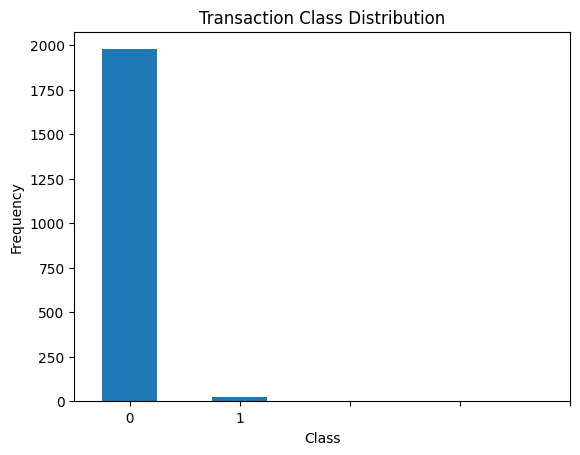

In [11]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot = 2)

plt.title("Transaction Class Distribution")

plt.xticks(range(5),)

plt.xlabel("Class")

plt.ylabel("Frequency")

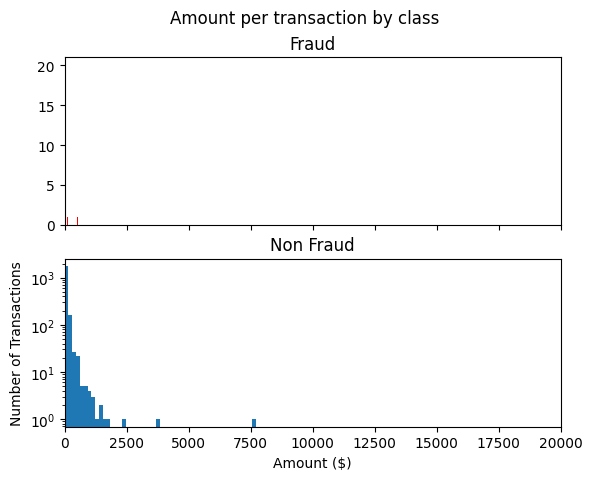

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins, color='red')
ax1.set_title('Fraud')
ax2.hist(Non_fraud.Amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

## Minimum amount of transaction was made was `0.0$` which look some kind of error or it can be outlier

In [13]:
Fraud.Amount.describe()

count     24.000000
mean      40.203333
std      116.460520
min        0.000000
25%        0.990000
50%        1.000000
75%        2.985000
max      529.000000
Name: Amount, dtype: float64

In [14]:
Non_fraud.Amount.describe()

count    1975.000000
mean       68.718035
std       241.987222
min         0.000000
25%         5.000000
50%        15.190000
75%        64.000000
max      7712.430000
Name: Amount, dtype: float64

## and maximun amount of transcation was `25691.160000` which is clearly outlier we will work on it later

<Axes: >

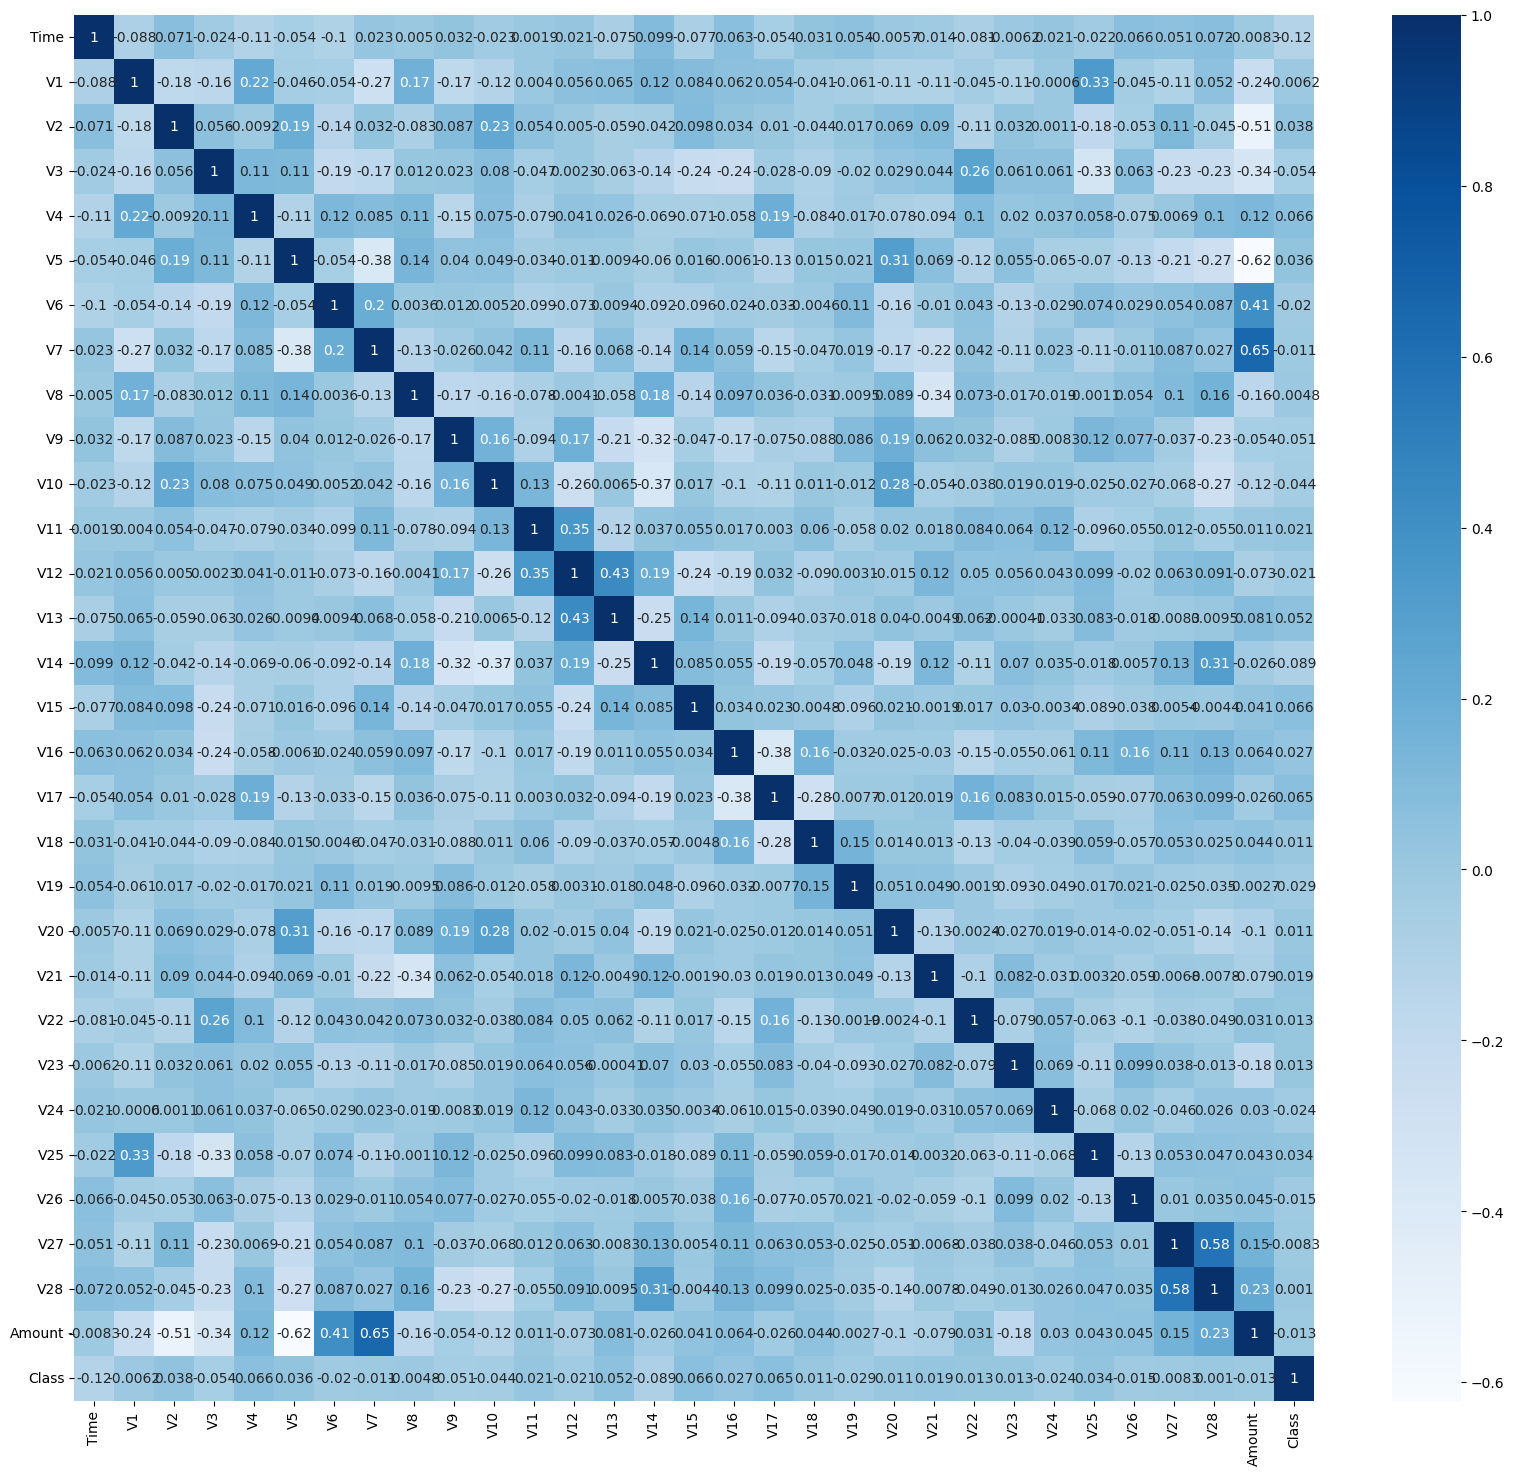

In [15]:
plt.figure(figsize=(20,18))
sn.heatmap(df.corr(),annot=True, cmap="Blues")

In [16]:
df1 = df.copy()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## in our data Columns V1 to V28 are generated from  PCA dimensionality so we have to scale our data
## Using robustscaler on the unscaled columns

In [18]:
rob_scaler = RobustScaler()
df1['Amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1, 1))
df1['Time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1, 1))

In [19]:
X=df1.drop('Class', axis=1)
y=df1['Class']
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

## Function to train models which will give us required result from the classifier after training

In [20]:
def predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions = pd.DataFrame(pred)
    print(f'Model Predicted Result: \n{predictions[0].value_counts()}')
    print(f'Confusion Matrix\n {confusion_matrix(y_test, pred)}')
    print(f'Classification Report\n {classification_report(y_test,pred)}')
    print(f'Accuracy Score: {accuracy_score(y_test,pred)}')

# LogisticRegression

In [21]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    397
1      3
Name: 0, dtype: int64
Confusion Matrix
 [[392   3]
 [  5   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.49       400
weighted avg       0.98      0.98      0.98       400

Accuracy Score: 0.98


# DecisionTreeClassifier

In [22]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    392
1      8
Name: 0, dtype: int64
Confusion Matrix
 [[388   7]
 [  4   1]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       395
           1       0.12      0.20      0.15         5

    accuracy                           0.97       400
   macro avg       0.56      0.59      0.57       400
weighted avg       0.98      0.97      0.98       400

Accuracy Score: 0.9725


# RandomForestClassifier

In [23]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    400
Name: 0, dtype: int64
Confusion Matrix
 [[395   0]
 [  5   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.00      0.00      0.00         5

    accuracy                           0.99       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.98      0.99      0.98       400

Accuracy Score: 0.9875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MLPClassifier

In [26]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    399
1      1
Name: 0, dtype: int64
Confusion Matrix
 [[394   1]
 [  5   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.98      0.98      0.98       400

Accuracy Score: 0.985


### <font color='cram'> While working in an imbalanced domain accuracy is not an appropriate measure to evaluate model performance. 


# Balancing Data using _**[Sampling Methods]**_
 Balancing technique of data 

## Over Sampling

In [27]:
from sklearn.utils import resample
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 27)

In [28]:
Un_X = pd.concat([X_train, y_train], axis=1)
not_fraud = Un_X[Un_X.Class == 0]
fraud = Un_X[Un_X.Class == 1]

In [29]:
df_overSample = resample(fraud,n_samples=len(not_fraud), replace=True, random_state=27)

In [30]:
upsampled = pd.concat([not_fraud, df_overSample])

In [31]:
upsampled.Class.value_counts()

0    1580
1    1580
Name: Class, dtype: int64

In [32]:
df.shape, upsampled.shape

((1999, 31), (3160, 31))

In [33]:
data1= upsampled.sample(frac = 0.5,random_state=1)

In [34]:
data1.shape

(1580, 31)

Text(0, 0.5, 'Frequency')

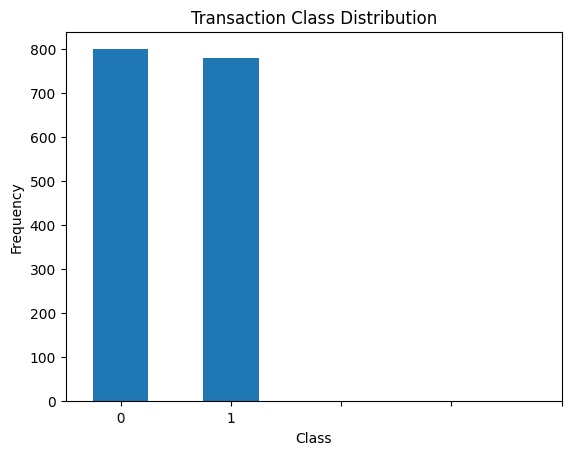

In [35]:
count_classes = data1.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=2)

plt.title("Transaction Class Distribution")
plt.xticks(range(5),)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [36]:
X_O = data1.drop('Class', axis=1)
y_O = data1.Class
#X_train, y_train, X_train, y_test = train_test_split(X_trainO, y_trainO, train_size=.6)
X_train,X_test, y_train, y_test= train_test_split(X_O,y_O, test_size=0.2, random_state= 27)

In [37]:
X_train.shape

(1264, 30)

In [38]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier()]
len(models)

6

In [39]:
#for model in models:
    #predict(model)

## LogisticRegression

In [40]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    158
1    158
Name: 0, dtype: int64
Confusion Matrix
 [[136  27]
 [ 22 131]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       163
           1       0.83      0.86      0.84       153

    accuracy                           0.84       316
   macro avg       0.84      0.85      0.84       316
weighted avg       0.85      0.84      0.84       316

Accuracy Score: 0.8449367088607594


#

In [41]:
upsampled.Class.value_counts()

0    1580
1    1580
Name: Class, dtype: int64

## DecisionTreeClassifier

In [42]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    161
1    155
Name: 0, dtype: int64
Confusion Matrix
 [[161   2]
 [  0 153]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       163
           1       0.99      1.00      0.99       153

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316

Accuracy Score: 0.9936708860759493


## RandomForestClassifier

In [43]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    163
1    153
Name: 0, dtype: int64
Confusion Matrix
 [[163   0]
 [  0 153]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       153

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316

Accuracy Score: 1.0


## MLPClassifier

In [46]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
1    159
0    157
Name: 0, dtype: int64
Confusion Matrix
 [[157   6]
 [  0 153]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       163
           1       0.96      1.00      0.98       153

    accuracy                           0.98       316
   macro avg       0.98      0.98      0.98       316
weighted avg       0.98      0.98      0.98       316

Accuracy Score: 0.9810126582278481


## Random Under-Sampling <br>`Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.`

In [47]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 17
Before Undersampling, counts of label '0': 1382 

After Undersampling, the shape of train_X: (34, 30)
After Undersampling, the shape of train_y: (34,) 

After Undersampling, counts of label '1': 17
After Undersampling, counts of label '0': 17


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_train_miss, y_train_miss, test_size = 0.2, random_state = 0)

In [51]:
X_train.shape

(27, 30)

In [52]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    4
1    3
Name: 0, dtype: int64
Confusion Matrix
 [[2 0]
 [2 3]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

Accuracy Score: 0.7142857142857143


In [53]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    4
1    3
Name: 0, dtype: int64
Confusion Matrix
 [[2 0]
 [2 3]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

Accuracy Score: 0.7142857142857143


In [54]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    4
1    3
Name: 0, dtype: int64
Confusion Matrix
 [[2 0]
 [2 3]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

Accuracy Score: 0.7142857142857143


In [57]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
1    4
0    3
Name: 0, dtype: int64
Confusion Matrix
 [[2 0]
 [1 4]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.80      0.89         5

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7

Accuracy Score: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Synthetic Minority Oversampling Technique

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101, sampling_strategy=0.4)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [60]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3)

In [62]:
X_train.shape, y_train.shape

((1353, 30), (1353,))

In [63]:
predict(LogisticRegression(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    391
1    189
Name: 0, dtype: int64
Confusion Matrix
 [[378  28]
 [ 13 161]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       406
           1       0.85      0.93      0.89       174

    accuracy                           0.93       580
   macro avg       0.91      0.93      0.92       580
weighted avg       0.93      0.93      0.93       580

Accuracy Score: 0.9293103448275862


In [64]:
predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    398
1    182
Name: 0, dtype: int64
Confusion Matrix
 [[388  18]
 [ 10 164]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       406
           1       0.90      0.94      0.92       174

    accuracy                           0.95       580
   macro avg       0.94      0.95      0.94       580
weighted avg       0.95      0.95      0.95       580

Accuracy Score: 0.9517241379310345


In [65]:
predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    410
1    170
Name: 0, dtype: int64
Confusion Matrix
 [[406   0]
 [  4 170]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       406
           1       1.00      0.98      0.99       174

    accuracy                           0.99       580
   macro avg       1.00      0.99      0.99       580
weighted avg       0.99      0.99      0.99       580

Accuracy Score: 0.993103448275862


In [68]:
predict(MLPClassifier(), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    404
1    176
Name: 0, dtype: int64
Confusion Matrix
 [[404   2]
 [  0 174]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.99      1.00      0.99       174

    accuracy                           1.00       580
   macro avg       0.99      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580

Accuracy Score: 0.996551724137931


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## From the above research we found that RandomForest and MLPClassifire are giving the best result in every case<br> so we do our futher research on them 

# __HyperParameter Tuning__ with `SMOTE Oversampled data`

## For RandomForest

In [69]:
rf = RandomForestClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'Random_Forset':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,100, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['auto', 'sqrt', 'log2']
        }
    }
}

In [71]:
scores = []

for model_name, model_par in model_params.items():
    clf = GridSearchCV(model_par['model'],model_par['params'], cv=5, return_train_score=False)
    print(f'Training with Parameter:  {model_par}')
    clf.fit(X_train, y_train)
    #predict(model_par['model'],X_train, y_train, X_test, y_test)
    scores.append({
        'model':model_name,
        'best_params':clf.best_params_,
        'best_score':clf.best_score_
    })
Model_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training with Parameter:  {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 100, 1000], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [72]:
joblib.dump(clf, 'rf_with_100_nes')

['rf_with_100_nes']

In [73]:
rfc = joblib.load('rf_with_100_nes')

In [74]:
rfc.cv_results_

{'mean_fit_time': array([0.05376759, 0.51729693, 4.80737567, 0.06924973, 0.58327169,
        4.77891316, 0.04396815, 0.39392195, 4.27699428, 0.08229136,
        0.64623408, 5.56294813, 0.05267692, 0.48478751, 5.21885724,
        0.0749743 , 0.55065794, 4.74278474]),
 'std_fit_time': array([0.00218703, 0.08083539, 0.362846  , 0.00217791, 0.07781718,
        0.35912484, 0.00268864, 0.00209978, 0.16182035, 0.00261079,
        0.27223716, 0.94003553, 0.00415004, 0.00455852, 0.41514091,
        0.00379518, 0.10534245, 0.40680196]),
 'mean_score_time': array([0.0053659 , 0.02227092, 0.14336286, 0.00675931, 0.01943946,
        0.1469203 , 0.00418553, 0.01583343, 0.16703277, 0.00622735,
        0.01533613, 0.13580046, 0.00447502, 0.01545458, 0.14266992,
        0.00737715, 0.021313  , 0.14845529]),
 'std_score_time': array([1.21140219e-03, 5.77399844e-03, 1.83457222e-02, 4.28669832e-04,
        3.39871526e-03, 3.16374932e-02, 3.54333967e-05, 3.53272763e-04,
        3.55665663e-02, 4.06805695e-

In [75]:
Model_df 

,model,best_score,best_params
0,Random_Forset,0.990392,"{'criterion': 'entropy', 'max_features': 'sqrt..."


## Avoiding GridSearchCV tunining method to save time

In [76]:
predict(RandomForestClassifier(n_estimators=100, criterion='gini'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    409
1    171
Name: 0, dtype: int64
Confusion Matrix
 [[406   0]
 [  3 171]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       406
           1       1.00      0.98      0.99       174

    accuracy                           0.99       580
   macro avg       1.00      0.99      0.99       580
weighted avg       0.99      0.99      0.99       580

Accuracy Score: 0.9948275862068966


### Not so much change in confustion matrix lets try `entropy`

In [77]:
predict(RandomForestClassifier(n_estimators=100, criterion='entropy'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    409
1    171
Name: 0, dtype: int64
Confusion Matrix
 [[405   1]
 [  4 170]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       0.99      0.98      0.99       174

    accuracy                           0.99       580
   macro avg       0.99      0.99      0.99       580
weighted avg       0.99      0.99      0.99       580

Accuracy Score: 0.9913793103448276


In [79]:
# let see the result 
predict(RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='sqrt'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    408
1    172
Name: 0, dtype: int64
Confusion Matrix
 [[405   1]
 [  3 171]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       406
           1       0.99      0.98      0.99       174

    accuracy                           0.99       580
   macro avg       0.99      0.99      0.99       580
weighted avg       0.99      0.99      0.99       580

Accuracy Score: 0.993103448275862


In [80]:
predict(RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='sqrt'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    409
1    171
Name: 0, dtype: int64
Confusion Matrix
 [[405   1]
 [  4 170]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       0.99      0.98      0.99       174

    accuracy                           0.99       580
   macro avg       0.99      0.99      0.99       580
weighted avg       0.99      0.99      0.99       580

Accuracy Score: 0.9913793103448276


## SO by increasing tree number no changes found so will stick to 100 n_estimators

## using Cross validation 

In [81]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt')

In [82]:
cv = StratifiedKFold(n_splits=10)

In [83]:
score = cross_val_score(clf, X_train, y_train, cv=cv)

In [84]:
score

array([1.        , 1.        , 0.99264706, 0.98518519, 0.97777778,
       0.98518519, 0.98518519, 0.99259259, 1.        , 0.98518519])

In [85]:
np.mean(score)

0.9903758169934642

# MLPClassifier

In [86]:
model_params = {
    'MLPClassifier':{
        'model':MLPClassifier(),
        'params':{
            'hidden_layer_sizes':[(100), (50)],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
        }
    }
}

In [87]:
predict(MLPClassifier(hidden_layer_sizes=100, activation='identity', solver='lbfgs'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    390
1    190
Name: 0, dtype: int64
Confusion Matrix
 [[380  26]
 [ 10 164]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       406
           1       0.86      0.94      0.90       174

    accuracy                           0.94       580
   macro avg       0.92      0.94      0.93       580
weighted avg       0.94      0.94      0.94       580

Accuracy Score: 0.9379310344827586


In [88]:
predict(MLPClassifier(hidden_layer_sizes=100, activation='logistic', solver='adam'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    391
1    189
Name: 0, dtype: int64
Confusion Matrix
 [[386  20]
 [  5 169]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       406
           1       0.89      0.97      0.93       174

    accuracy                           0.96       580
   macro avg       0.94      0.96      0.95       580
weighted avg       0.96      0.96      0.96       580

Accuracy Score: 0.9568965517241379


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
predict(MLPClassifier(hidden_layer_sizes=100, activation='logistic', solver='lbfgs'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    399
1    181
Name: 0, dtype: int64
Confusion Matrix
 [[398   8]
 [  1 173]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       406
           1       0.96      0.99      0.97       174

    accuracy                           0.98       580
   macro avg       0.98      0.99      0.98       580
weighted avg       0.98      0.98      0.98       580

Accuracy Score: 0.9844827586206897


In [90]:
predict(MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    404
1    176
Name: 0, dtype: int64
Confusion Matrix
 [[404   2]
 [  0 174]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.99      1.00      0.99       174

    accuracy                           1.00       580
   macro avg       0.99      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580

Accuracy Score: 0.996551724137931


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Removing Outliers

In [91]:
Outlier.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [92]:
Outlier.shape

(1999, 31)

## By law, banks report all cash transactions that exceed $10,000 — the international money transfer reporting limit set by the IRS.
https://www.finder.com/taxes-regulations-on-large-money-transfers-to-us#:~:text=By%20law%2C%20banks%20report%20all,amount%20that%20alerts%20its%20suspicions.

In [93]:
Non_outlier = Outlier[(Outlier['Amount'] > 0) & (Outlier['Amount'] < 20000)]

In [94]:
Non_outlier.shape[0] - Outlier.shape[0]

-13

In [95]:
X = Non_outlier.drop('Class', axis=1)
y = Non_outlier.Class

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1000)

In [97]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3, random_state = 100)

In [99]:

X_train.shape, y_train.shape

((1350, 30), (1350,))

In [100]:
predict(RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='sqrt'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    430
1    149
Name: 0, dtype: int64
Confusion Matrix
 [[429   1]
 [  1 148]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       0.99      0.99      0.99       149

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

Accuracy Score: 0.9965457685664939


In [101]:
predict(MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam'), X_train, y_train, X_test, y_test)

Model Predicted Result: 
0    416
1    163
Name: 0, dtype: int64
Confusion Matrix
 [[416  14]
 [  0 149]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       430
           1       0.91      1.00      0.96       149

    accuracy                           0.98       579
   macro avg       0.96      0.98      0.97       579
weighted avg       0.98      0.98      0.98       579

Accuracy Score: 0.9758203799654577


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
score = cross_val_score(clf, X_train, y_train, cv=cv)
score

array([0.99259259, 0.99259259, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99259259, 1.        ])

In [103]:
np.mean(score)

0.9977777777777778

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [106]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [107]:
clf.score(X_test, y_test)

0.998272884283247